In [2]:
# loading the basic libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
# loading the data and view the head 
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Complete-Deep-Learning/master/ANN/Churn_Modelling.csv') 
df.head() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# get the total shape of the data 
df.shape

(10000, 14)

In [5]:
# taking the features 
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]


In [6]:
# Create dummy variables 
geography = pd.get_dummies(X["Geography"], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True) 

# dropping unnessary columns 
X = X.drop(['Geography', 'Gender'], axis = 1) 

In [7]:
# concantenate the dummies 
X = pd.concat([X, geography, gender], axis = 1) 
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
# Splitting the dataset into train and test 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0) 

In [9]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# importing the keras libraries 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LeakyReLU,PReLU, ELU 
from keras.layers import Dropout 

In [14]:
classifier = Sequential() 
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'sigmoid')) 

# additing output layer 
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


# compiling the ann 
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy']) 

# fitting ann to the training set 
model_history = classifier.fit(X_train,y_train, validation_split = 0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 7s 3ms/step - loss: 0.8141 - accuracy: 0.3162 - val_loss: 0.5473 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5262 - accuracy: 0.7920 - val_loss: 0.4943 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5087 - accuracy: 0.7801 - val_loss: 0.4829 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4821 - accuracy: 0.7941 - val_loss: 0.4742 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4621 - accuracy: 0.8008 - val_loss: 0.4675 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4656 - accuracy: 0.7946 - val_loss: 0.4613 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4547 - accuracy: 0.7950 - val_loss: 0.4561 - val_accuracy: 0.7955

In [15]:
#  making the test set rsulsts 
y_pred = classifier.predict(X_test) 
y_pred = y_pred>0.5

#  making the confusion matrix 
from sklearn.metrics import  confusion_matrix 
cm = confusion_matrix(y_test, y_pred)

# calculate the accuracy 
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_pred, y_test)
print(score) 

0.861


In [16]:
X_train.shape

(8000, 11)

In [17]:
8000 - (8000 * (33/100))

5360.0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


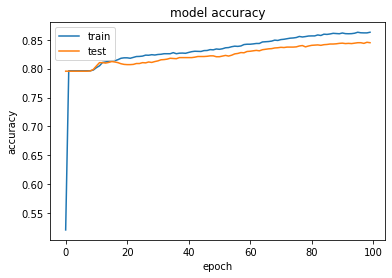

In [18]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

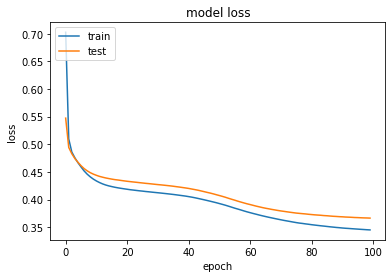

In [19]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
